In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
pwd

'C:\\Users\\Sowmya Ganesh\\Documents'

In [3]:
os.chdir("C:/Users/Sowmya Ganesh/Documents")

In [4]:
os.listdir()

['.ipynb_checkpoints',
 '1.00 SNS EDA Titanic TILL Logistic regression.ipynb',
 '50_Startups.csv',
 '50_Startups.ipynb',
 'B89 18_11_2023 Python ML.ipynb',
 'B89_Session_lasso_ridge_16_12_2023.ipynb',
 'Boxplot_B89_02_12_2023.ipynb',
 'Boxplot_ip.png',
 'Call Center Data.csv',
 'Custom Office Templates',
 'Dataset-Opportunity Tracking.xlsx',
 'Delivery.xltx',
 'Delivery_area.png',
 'Delivery_corr.png',
 'Delivery_doc.docx',
 'Delivery_Graphs',
 'Delivery_Project.ipynb',
 'Delivery_Regression.png',
 'Delivery_scatter.png',
 'delivery_time.csv',
 'desktop.ini',
 'Exercises-1 Solutions.ipynb',
 'final_df.csv',
 'Heatmap_ip.png',
 'iphone_prj5.ipynb',
 'iphone_purchase_records.csv',
 'KNN_iphone_model.sav',
 'KNN_Iphone_Reg_Model.ipynb',
 'KNN_Regression_And _Classification.ipynb',
 'KNN_Reg_Class.ipynb',
 'KNN_Reg_Model.sav',
 'KNN_Reg_Model_Saved.ipynb',
 'Logistic_regression_and_Decession_Tree.ipynb',
 'mpg.csv',
 'My Music',
 'My Pictures',
 'My Tableau Repository',
 'My Videos',
 'Num

In [5]:
data=pd.read_csv("C:/Users/Sowmya Ganesh/Documents/Position_Salaries_DataSet.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
#creating Data copy
df=data.copy()

### Basic Information Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [8]:
#There are three columns Position,Level and Salary.
#No null values are found,so no need to do the changes in the dataframe.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,10.0,5.5,3.027650,1.0,3.25,5.5,7.75,10.0
Salary,10.0,249500.0,299373.883668,45000.0,65000.00,130000.0,275000.00,1000000.0


In [10]:
df.shape

(10, 3)

## Exploratory Data Analysis(EDA)

<Axes: xlabel='Salary', ylabel='Level'>

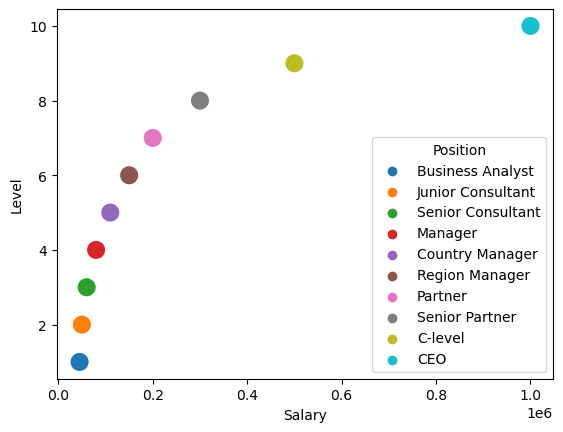

In [11]:
sns.scatterplot(data=df,x="Salary",y="Level",s=200,legend=True,hue="Position")

<Axes: xlabel='Position', ylabel='Salary'>

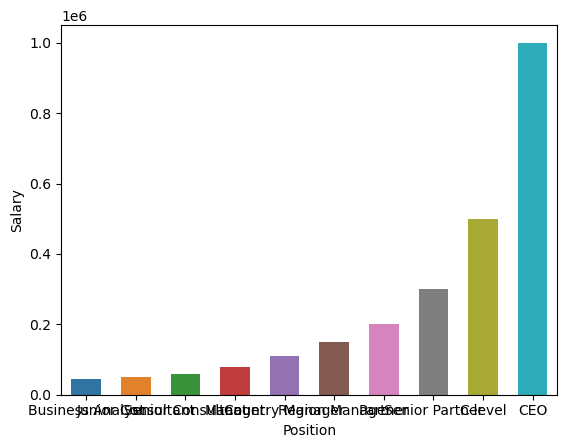

In [12]:
sns.barplot(data=df,x="Position",y="Salary",orient="vertical",width=0.6)

<Axes: >

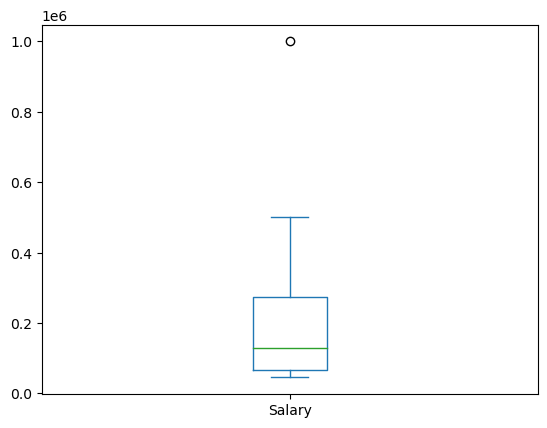

In [13]:
df[["Position","Salary"]].plot(kind="box",legend=True)

<Axes: >

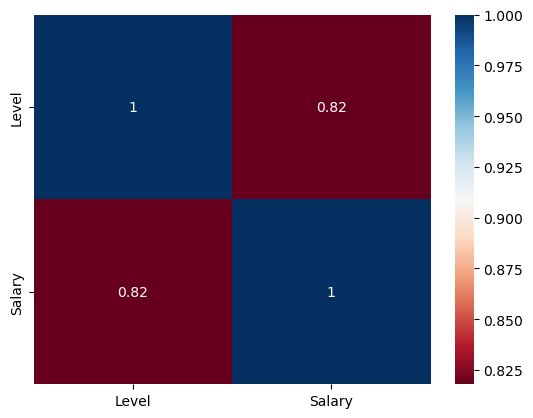

In [14]:
sns.heatmap(df[["Level","Salary"]].corr(),annot=True,cmap='RdBu',cbar=True)
#sns.heatmap(salary_hike[['YearsExperience','Salary']].corr(),annot=True,cmap='RdBu',cbar=True)

In [15]:
#No need to impute the outliers.
#Takeaways from the EDA. 
#Salary increases as the Position Insreases.
#The correlation between Salary and level is high.

## Creating the linear Model

In [16]:
#The Salary is dependent variable and Position and Level are independent variables.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [18]:
x=df['Level'].values.reshape(-1,1)

In [19]:
y=df['Salary'].values.reshape(-1,1)

In [20]:
lin= LinearRegression()
print("The model is completed")

The model is completed


In [21]:
lin.fit(x,y)
print("Training Completed")

Training Completed


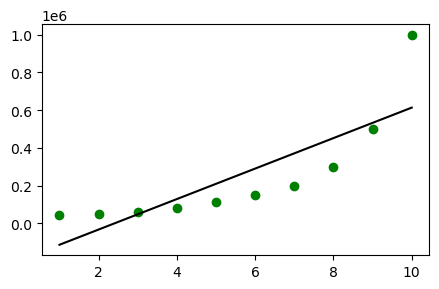

In [22]:
plt.figure(figsize=(5,3))
plt.scatter(x,y,color="green")
plt.plot(x,lin.predict(x),color="black")

In [23]:
### The actual points are deviated or far away from the predicted line.
### We need to fit the line through the points
### Creating a Polynomial Regression with degree 4 to get more accuracy 

### Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree = 4)
print("Loaded the polynomial features.")

Loaded the polynomial features.


In [26]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [27]:
x_poly = poly.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [28]:
poly.fit(x_poly,y)
print("Polynomial Feature is fitted and Trained")

Polynomial Feature is fitted and Trained


In [29]:
linear = LinearRegression()

In [30]:
linear.fit(x_poly,y)
print("Model is trained using polynomial features.")

Model is trained using polynomial features.


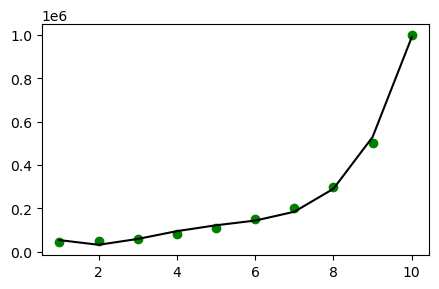

In [31]:
plt.figure(figsize=(5,3))
plt.scatter(x,y,color="green")
plt.plot(x,linear.predict(x_poly), color = "black")

In [32]:
R2=r2_score(y,lin.predict(x))
print("The R2_score or Co-efficient of determination of Linear Model is:",round(R2,2))
print("The accuracy of this model is:",round(R2*100,2),"%")

The R2_score or Co-efficient of determination of Linear Model is: 0.67
The accuracy of this model is: 66.9 %


In [33]:
### The r2_score is not as expected in linear regression.
### Checking with the polynomial regression.

In [38]:
r2=r2_score(y,linear.predict(x_poly))
print("The R2_Score or Co-efficient of Determonation of Polynomial Regression model is:",round(r2,3))
print("The accuracy of the model is:",round(r2*100,2),"%")

The R2_Score or Co-efficient of Determonation of Polynomial Regression model is: 0.997
The accuracy of the model is: 99.74 %


In [39]:
### The r2_score with polynomial regression is so accurate with 4th degree as 99.74%.
### The r2_score required for a great model as 99.74%.

In [37]:
## To save the created model
import joblib
joblib.dump(linear,'Position_Salaries.sav')
print("The Polynomial Regression model is saved.")

The Polynomial Regression model is saved.
